In [1]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Work\MS-AI\course-7\Project\IoT_Gas_Turbine\notebooks


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# Load & combine Data CSV files

train_files = glob.glob('../dataset/train/*.csv')
train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True) 
print("Total training rows", {train_data.shape[0]})

Total training rows {52940}


In [16]:
# Data Cleaning

train_data = train_data.drop_duplicates()
train_data = train_data.dropna()

print("Total training rows", {train_data.shape[0]})
train_data.head()

Total training rows {52940}


,time,input_voltage,el_power
0,810.07028,10.0,1228.791720
1,811.06938,10.0,1223.041745
2,812.06848,10.0,1244.960866
3,813.06758,10.0,1229.259058
4,814.06668,10.0,1248.117024


In [17]:
# Ensure numeric types

train_data["input_voltage"] = pd.to_numeric(train_data["input_voltage"], errors='coerce')
train_data["el_power"] = pd.to_numeric(train_data["el_power"], errors='coerce')
train_data.dropna()
print(f"Training rows after cleaning: {train_data.shape[0]}", train_data.head())

Training rows after cleaning: 52940         time  input_voltage     el_power
0  810.07028           10.0  1228.791720
1  811.06938           10.0  1223.041745
2  812.06848           10.0  1244.960866
3  813.06758           10.0  1229.259058
4  814.06668           10.0  1248.117024


In [18]:
# Feature Selection

X = train_data[['input_voltage']]
y = train_data['el_power']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (52940, 1)
y shape: (52940,)


In [19]:
# Training Validation split

split_idx = int(len(X) * 0.8)

X_train = X.iloc[:split_idx]
X_val   = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_val   = y.iloc[split_idx:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")




Training samples: 42352
Validation samples: 10588


In [20]:
# Feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [21]:
# Build deep learning model

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # Output Layer: predicts el_power
    
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

c:\Work\MS-AI\course-7\Project\IoT_Gas_Turbine\course7_Project_venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 676514.4375 - mae: 466.9843 - val_loss: 11897.3340 - val_mae: 89.8646
Epoch 2/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 140754.7812 - mae: 216.9854 - val_loss: 15914.1094 - val_mae: 102.3693
Epoch 3/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 139811.9844 - mae: 214.9480 - val_loss: 14175.0605 - val_mae: 95.8398
Epoch 4/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 139497.1250 - mae: 214.8347 - val_loss: 11881.2188 - val_mae: 88.2943
Epoch 5/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 139189.5312 - mae: 213.5720 - val_loss: 9204.6816 - val_mae: 77.5381
Epoch 6/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 139237.8281 - mae: 213.4314 - val_loss: 13848.1738 - val_mae: 95.3224
Epoch 7/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 139245.9219 - mae: 213.3614 - val_loss: 13643.3301 - val_mae: 93.7808
Epoch 8/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 139071

In [24]:
val_loss, val_mae = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"\nValidation MSE: {val_loss:.3f}, MAE: {val_mae:.3f}")


Validation MSE: 13110.007, MAE: 92.152


331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


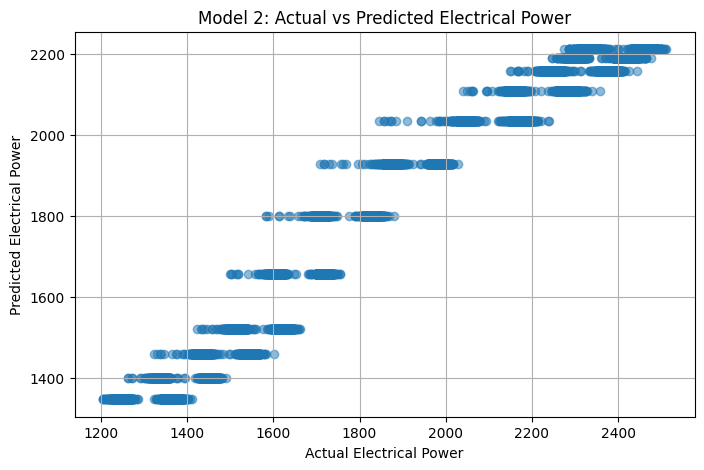

In [25]:
# Validation Visualization

y_val_pred = model.predict(X_val_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel("Actual Electrical Power")
plt.ylabel("Predicted Electrical Power")
plt.title("Model 2: Actual vs Predicted Electrical Power")
plt.grid(True)
plt.show()


In [26]:
# Make Prediction of Test data

test_files = glob.glob("../dataset/test/*.csv")

for f in test_files:
    test_data = pd.read_csv(f)

    test_data["input_voltage"] = pd.to_numeric(test_data["input_voltage"], errors='coerce')
    test_data["el_power"] = pd.to_numeric(test_data["el_power"], errors='coerce')

    test_data = test_data.dropna().drop_duplicates()
    test_data = test_data.sort_values(by="time")

    X_test_scaled = scaler.transform(test_data[['input_voltage']])
    test_data['predicted_el_power'] = model.predict(X_test_scaled)

    output_file = f.replace(".csv", "_dnn_predictions.csv")
    test_data.to_csv(output_file, index=False)

    print(f"Saved predictions to {output_file}")


266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Saved predictions to ../dataset/test\ex_22_dnn_predictions.csv
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
Saved predictions to ../dataset/test\ex_4_dnn_predictions.csv
